# DT Assignment1

# Data Loading

In [1]:
import pandas as pd 
import numpy as np

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제

In [3]:
pd_data.head()

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes


In [4]:
pd_data.columns

Index(['age', 'income', 'student', 'credit_rating', 'class_buys_computer'], dtype='object')

# 1. Gini 계수를 구하는 함수 만들기

- Input: df(데이터), label(타겟변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

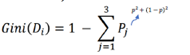

In [5]:
def get_gini(df, label):
    val_array = df[label].unique() #label에 있는 원소 반환 (예 : ["yes","no"])
    
    val_idx = [0 for i in range(len(val_array))] 
    #label에 있는 원소의 개수 저장 (예 :['yes의 개수','no의 개수'])
    #label에 있는 원소의 개수만큼 0으로 초기화
    
    sigma = 0
    
    for i in range(len(df[label])):
        for j in range(len(val_array)):
            if df[label][i] == val_array[j]:
                val_idx[j] += 1
    
    for i in range(len(val_array)):
        sigma += (val_idx[i]/len(df[label]))**2
        
                
    gini = 1 - sigma
    #gini = 1 - (sigma (/전체개수)^2)
    
    return gini


In [6]:
get_gini(pd_data,'class_buys_computer')

0.4591836734693877

In [7]:
get_gini(pd_data,'class_buys_computer')

0.4591836734693877

# 2. Feature의 Class를 이진 분류로 만들기
 ## ex) {A,B,C} -> ({A}, {B,C}), ({B}, {A,C}), ({C}, {A,B})

- Input: df(데이터), attribute(Gini index를 구하고자 하는 변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

In [8]:
import itertools # 변수의 모든 클래시 조합을 얻기 위해 itertools 불러오기
#안쓸랭!

def get_binary_split(df, attribute):
    
    val_array = df[attribute].unique() 
    #label에 있는 원소 반환 (예 : ["youth","middle_aged","senior"])
    
    result = []
    data = []
    
    for i in range(len(val_array)):
        result.append([val_array[i]]) #i 번째 원소 list에 저장
        data = np.delete(val_array,i) # i 번째 요소 제외한 array
        result.append(data.tolist()) # list로 바꾸어 저장
    
        
    return result 

In [9]:
get_binary_split(pd_data, "age")

[['youth'],
 ['middle_aged', 'senior'],
 ['middle_aged'],
 ['youth', 'senior'],
 ['senior'],
 ['youth', 'middle_aged']]

In [10]:
get_binary_split(pd_data, "age")

[['youth'],
 ['middle_aged', 'senior'],
 ['middle_aged'],
 ['youth', 'senior'],
 ['senior'],
 ['youth', 'middle_aged']]

# 3. 다음은 모든 이진분류의 경우의 Gini index를 구하는 함수 만들기
- 위에서 완성한 두 함수를 사용하여 만들어주세요!
- 해당 결과는 아래와 같이 나와야 합니다.
- 결과로 나온 Dictionary의 Key 값은 해당 class 들로 이루어진 tuple 형태로 들어가 있습니다.

In [11]:
def get_attribute_gini_index(df, attribute, label):
    result = {}
    get_idx = get_binary_split(df, attribute) #이진 분류 된 list 반환
    idx = 0
    for i in (get_idx):
        gini = 0
        df_i = pd.DataFrame(columns = [label])
        df_el_i = pd.DataFrame(columns = [label])
        cnt = 0
        cnt_el = 0
        for j in range(len(df)):
            if df[attribute][j] in i:
                df_i.loc[cnt, label] = df[label][j] #해당 class에 해당하는 data에 대한 새로운 dataframe
                cnt +=1
            else :
                df_el_i.loc[cnt_el, label] = df[label][j] #그외 class에 해당하는 data에 대한 새로운 dataframe
                cnt_el +=1
        
        gini = len(df_i)/len(df)*get_gini(df_i,label) + len(df_el_i)/len(df)*get_gini(df_el_i,label)
        result[''.join(i)] = gini

        

    return result

In [12]:
get_attribute_gini_index(pd_data, "age", "class_buys_computer")

{'youth': 0.3936507936507937,
 'middle_agedsenior': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'youthsenior': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'youthmiddle_aged': 0.45714285714285713}

In [13]:
get_attribute_gini_index(pd_data, "age", "class_buys_computer")

{'youth': 0.3936507936507937,
 'middle_agedsenior': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'youthsenior': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'youthmiddle_aged': 0.45714285714285713}

여기서 가장 작은 Gini index값을 가지는 class를 기준으로 split해야겠죠?

결과를 확인해보도록 하겠습니다.

In [14]:
my_dict = get_attribute_gini_index(pd_data, "age", "class_buys_computer")
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
print('Min -',key_min, ":", my_dict[key_min])

Min - middle_aged : 0.35714285714285715


# 다음의 문제를 위에서 작성한 함수를 통해 구한 값으로 보여주세요!
## 문제1) 변수 ‘income’의 이진분류 결과를 보여주세요.

## 문제2) 분류를 하는 데 가장 중요한 변수를 선정하고, 해당 변수의 Gini index를 제시해주세요.

## 문제3) 문제 2에서 제시한 feature로 DataFrame을 split한 후 나눠진 2개의 DataFrame에서 각각   다음으로 중요한 변수를 선정하고 해당 변수의 Gini index를 제시해주세요.

In [15]:
##문제1 답안

list = get_binary_split(pd_data, "income")
list

[['high'],
 ['medium', 'low'],
 ['medium'],
 ['high', 'low'],
 ['low'],
 ['high', 'medium']]

In [16]:
##문제2 답안
def gini_min(pd_data,label):
    data = pd_data.drop(label , axis=1)
    columns = data.columns
    min_result = {}
    my_dict = {}
    for col in (columns):
        get_attribute_gini_index(pd_data, col , label)
        my_dict = get_attribute_gini_index(pd_data, col, label)
        key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
    
        min_result [key_min]=  my_dict[key_min]
    
    key_result_min = min(min_result.keys(), key=(lambda k: min_result[k]))
    print('Min -',key_result_min, ":", min_result[key_result_min])
    #return은 사치다
    
gini_min(pd_data, "class_buys_computer")

Min - middle_aged : 0.35714285714285715


**Min - middle_aged : 0.35714285714285715**
변수 age의 ("middle_aged"), ("youth", "senior") 조합으로 이진 분류하는 것이 가장 낮은 gini index 값을 가지므로 변수 age가 분류에 있어 가장 중요한 변수이다

In [17]:
##문제3 답안

splited_data_1 = pd_data.loc[pd_data["age"].isin(["youth", "senior"]), :]
splited_data_2 = pd_data.loc[pd_data["age"] == "middle_aged", :]

splited_data_1 = pd.DataFrame(splited_data_1.values,columns=splited_data_1.columns)
splited_data_2 = pd.DataFrame(splited_data_2.values,columns=splited_data_2.columns)

In [18]:
splited_data_1

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,senior,medium,no,fair,yes
3,senior,low,yes,fair,yes
4,senior,low,yes,excellent,no
5,youth,medium,no,fair,no
6,youth,low,yes,fair,yes
7,senior,medium,yes,fair,yes
8,youth,medium,yes,excellent,yes
9,senior,medium,no,excellent,no


In [19]:
splited_data_2

,age,income,student,credit_rating,class_buys_computer
0,middle_aged,high,no,fair,yes
1,middle_aged,low,yes,excellent,yes
2,middle_aged,medium,no,excellent,yes
3,middle_aged,high,yes,fair,yes


In [20]:
gini_min(splited_data_1, "class_buys_computer")

Min - no : 0.31999999999999984


**'student': ('no', 0.31999999999999984)**

In [21]:
gini_min(splited_data_2, "class_buys_computer")

Min - middle_aged : 0.0
